# Data Science Project : Predicting Home Prices in Banglore

## Objective
- Develop a model to predict house prices based on location, square footage, number of bathrooms, and number of bedrooms. 
- This model will help buyers, sellers, and real estate agents make informed decisions with accurate price estimates.

In [3]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]

[6.4, 4.8]

**matplotlib.rcParams:** This is a dictionary-like object in Matplotlib that stores many configuration settings (or "rc parameters")
- Controlling the default styles for plots, including figure size, color, line width, font size, etc.

- **figure.figsize:** This is a specific parameter in **rcParams that controls the default dimensions of figures**.

- It expects a list or tuple with two values: the width and height of the figure in inches.

- This parameter is useful if you want a consistent figure size across all plots in a script or notebook, as it saves the need to specify figsize every time you create a plot

In [5]:
import warnings
warnings.simplefilter(action='ignore')              # returns without warnings of the code

### Dataset

**loading data : Load Banglore home prices into a dataframe**

In [8]:
df1 = pd.read_csv("C:\\Users\\dines\\Downloads\\bengaluru_house_prices.csv")         # loading the dataset
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
df1.tail()          # returns the bottom of the dataset

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [10]:
df1.sample(5)         # returns a random sample

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
8743,Built-up Area,Ready To Move,Nayandanahalli,7 Bedroom,NaN,6500,7.0,1.0,104.00
11438,Super built-up Area,18-Aug,JP Nagar,2 BHK,DSvvyx,1133,2.0,1.0,33.99
5975,Super built-up Area,Ready To Move,Whitefield,3 BHK,Toindls,2500,3.0,2.0,280.00
8394,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,3056,5.0,NaN,100.00
4323,Built-up Area,Ready To Move,Akshaya Nagar,3 BHK,DLhtsnd,1419,2.0,3.0,73.00


**Dependent variable, Target variable = price**

**Independent variable = remaining attributes**

In [12]:
df1.shape               # Returns the no of rows and columns

(13320, 9)

In [13]:
df1.columns          # prints the list of columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [14]:
df1.info()              # returns the Normal information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [17]:
df1.describe()                  # returns the statistical information about the dataset -> float columns

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [21]:
df1.describe(include = 'object')         # returns the information about the object datatype 

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


**Drop features that are not required to build our model**

In [27]:
df1.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Data cleaning

In [31]:
# ML algorithm can not perform text operations 
# so we can create new dataframe of a dropped text columns in df1

df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'],axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [33]:
# crosschecking the dataframes before and after using the drop method

print("The df before dropping columns",df1.shape)
print("The df after dropping columns",df2.shape)      

The df before dropping columns (13320, 9)
The df after dropping columns (13320, 5)


In [35]:
df2.sample(5)  # it returns the remaning columns with values -> 5 columns

,location,size,total_sqft,bath,price
2080,Bannerghatta Road,3 BHK,1760,3.0,67.00
2682,Dairy Circle,3 BHK,1980,3.0,224.00
6948,Kanakapura,2 BHK,1090,2.0,38.15
5499,Varanasi,5 BHK,2000,4.0,99.00
130,Peenya,3 BHK,1870,3.0,110.00


**Handling Null Values**

In [38]:
df2.isnull()              # prints the boolean value, if there is a null value it returns True

,location,size,total_sqft,bath,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
13315,False,False,False,False,False
13316,False,False,False,False,False
13317,False,False,False,False,False
13318,False,False,False,False,False


In [40]:
df2.isna()       # same as isnull()

,location,size,total_sqft,bath,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
13315,False,False,False,False,False
13316,False,False,False,False,False
13317,False,False,False,False,False
13318,False,False,False,False,False


In [42]:
df2.isnull().sum()                          # prints the count of a null values in all the columns

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [44]:
df3 = df2.dropna()        # Drop the null values and copying the df1 into df2
df3.isnull().sum()        # prints the count of a null values in all the columns -> df3

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [46]:
# After applying the dropna method sucessfully, some null values are removed respectively
# so we are checking the rows of the dataframes

print("Before dropna method :",df1.shape)             # prints the rows and columns of a df1
print("After dropna method :",df3.shape )             # prints the rows and columns of a df3

Before dropna method : (13320, 9)
After dropna method : (13246, 5)


In [48]:
df3.head()       

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Feature Enginerring


Feature engineering is the pre-processing step of machine learning, which is used to transform raw data into features that can be used for creating a predictive model using Machine learning or statistical Modelling.

Generally, all machine learning algorithms take input data to generate the output. The input data remains in a tabular form consisting of rows (instances or observations) and columns (variable or attributes), and these attributes are often known as features.

### Feature engineering in ML contains mainly four processes:
1. Feature Creation  - finding the most useful variables to be used in a predictive model
2. Transformations
3. Feature Extraction -  automated feature engineering process that generates new variables by extracting them from the raw data
4. Feature Selection. -

While developing the machine learning model, only a few variables in the dataset are useful for building the model, and the rest features are either redundant or irrelevant. If we input the dataset with all these redundant and irrelevant features, it may negatively impact and reduce the overall performance and accuracy of the model.

Feature selection is a way of selecting the subset of the most relevant features from the original features set by removing the redundant, irrelevant, or noisy features."

*Add new feature(integer) for bhk (Bedroom Hall kitchen)*

In [51]:
# object datatype
# The object data type is a catch-all for columns that contain mixed types or strings.
# This means that the ‘size’ column contains mixed types (numbers and strings), so pandas assigns it the object data type ('O').

df3['size'].dtype

dtype('O')

In [53]:
# some of the values are like this -> [2 BHK, 4 bedroom]

df3['size']       # displays the size column values 

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13246, dtype: object

- we can create a new column called 'bhk' which is basically an integer datatype
- convert the object datatype of a size column into integer datatype of a numerical column called 'bhk' using split method
- 2 bhk, 3bhk, 4 bedroom --> 2, 3, 4 

In [56]:
# x.split(' ')    : Splits the string x at each space character and returns a list of substrings.  ex: 2 BHK -> '2' & 'BHk', 4 bedroom ->'4' & 'Bedroom'
# x.split(' ')[0] : Takes the first element of the list (i.e., the part before the first space) ex: 2 BHK -> 2, 4 Bedroom -> 4, ignore space after words
# int(...)        : Converts that first element to an integer.

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))     # [0]-> it considers the starting value, ignore space after the values
df3.sample(5)

,location,size,total_sqft,bath,price,bhk
5588,Kothanur,4 Bedroom,3401,5.0,230.0,4
7386,RMV,3 BHK,2075,3.0,175.0,3
11437,Whitefield,2 BHK,1190,2.0,70.0,2
1153,Bileshivale,4 Bedroom,6000,5.0,400.0,4
10817,Raja Rajeshwari Nagar,2 BHK,1270,2.0,62.0,2


### Explore the bhk column

In [59]:
print("The datatype of a new column bhk after conversion is:",df3['bhk'].dtype)             # prints the data type
print("\n",df3.head())

The datatype of a new column bhk after conversion is: int64

                    location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2


In [61]:
print(df3.bhk.unique())     # it returns the unique value of a new column

[ 2  4  3  6  1  8  7  5 11  9 27 10 19 16 43 14 12 13 18]


In [63]:
 df3['bhk'].unique()           # prints the unique values in bhk column

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [65]:
# exploring the bhk values here

df3[df3.bhk>20]         #  prints bhk value that is greater than 20               

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


- The output shows '27 bhk' with '8000 sqft' and '43 bhk' in '2400 sqft'.
- It looks like noisy
- And this are called as outliers. whenever we run the code it gives an inapproriate ouput     

In [68]:
df3.sample(5)

,location,size,total_sqft,bath,price,bhk
4889,Dairy Circle,4 BHK,3754,6.0,430.0,4
4184,Electronic City,2 BHK,1200,2.0,59.0,2
6863,Nagadevanahalli,2 Bedroom,2400,2.0,135.0,2
7682,Whitefield,3 BHK,1806,3.0,85.0,3
7495,Subramanyapura,3 Bedroom,600,3.0,69.0,3


### Exploring the total_sqft column

In [71]:
print("The data type of total sqft column is:",df3['total_sqft'].dtype)

The data type of total sqft column is: object


In [73]:
df3['total_sqft'].unique()                # print unique values

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [75]:
df3.head(50)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [77]:
df3.sample(50)

,location,size,total_sqft,bath,price,bhk
7677,Ramamurthy Nagar,3 BHK,1305,3.0,60.00,3
9203,7th Phase JP Nagar,2 BHK,980,2.0,86.00,2
2572,Arehalli,3 BHK,1229,3.0,86.03,3
1893,Kengeri Satellite Town,2 BHK,1072,2.0,25.00,2
6640,Somasundara Palya,3 BHK,1600,3.0,69.00,3
3010,Bileshivale,4 Bedroom,4000,5.0,280.00,4
7593,B K Nagar,6 Bedroom,2400,5.0,300.00,6
13237,Malleshpalya,2 BHK,1225,2.0,52.00,2
7192,Jigani,3 BHK,1230,3.0,60.00,3
5998,Kammanahalli,4 Bedroom,1800,2.0,280.00,4


- The value are not in same format they are in different formats such as:
- Range type: 1133 - 1384 
- Float type: 1330.74
- 117Sq. Yards
- And other cases as well, we have explore it 
- so we have to handle such type of values first

In [80]:
print("The column contain integer type of values such as :",df3['total_sqft'].loc[10])  # integer values
print("The column contain range type of values such as   :",df3['total_sqft'].loc[30])  # range 
print("The column contain float type of values such as   :",df3['total_sqft'].loc[44])  # float

The column contain integer type of values such as : 1800
The column contain range type of values such as   : 2100 - 2850
The column contain float type of values such as   : 1330.74


In [82]:
# function for finding the float values of a total_sqft column 

def is_float(x):                    # Ex - 2350
    try:
        float(x)                    # 2350.00
    except:
        return False
    return True

- Tries to convert x to a float: If it works (like turning 2350 into 2350.00), it moves on.

- If it fails (like if x is a word or something that can't be a number), it will stop and return False.

- If it works, it will return True.

In [85]:
df3['total_sqft'].apply(is_float)      # prints the total sqft column values is float or not,if it is float it returns true else false

0        True
1        True
2        True
3        True
4        True
         ... 
13315    True
13316    True
13317    True
13318    True
13319    True
Name: total_sqft, Length: 13246, dtype: bool

In [87]:
df3['total_sqft'].apply(is_float).loc[:45]   # return the boolean values, if it is not float it returns False

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30    False
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
Name: total_sqft, dtype: bool

In [89]:
# in between (0-45) there is only one False statment which is basically a range value

print(df3.loc[30])
print("\nThe 30th index value is float?:",df3['total_sqft'].apply(is_float).loc[30])             

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
price               186.0
bhk                     4
Name: 30, dtype: object

The 30th index value is float?: False


In [91]:
# int or float type of values

df3 [ df3['total_sqft'].apply(is_float) ] .head(44)           # Return only the rows having float or int types

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [93]:
# range values

df3 [~df3['total_sqft'].apply(is_float)] .head(100)                # "~" it returns the opposite valuess such as, range 

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
6552,5 Bedroom Farm House in Lakshmipura,5 Bedroom,24Guntha,6.0,550.000,5
6581,Sarjapur Road,3 BHK,1270 - 1275,2.0,40.720,3
6587,Kadugodi,1 BHK,840 - 1010,1.0,40.700,1
6592,Langford Town,4 BHK,697Sq. Meter,4.0,211.000,4


- Above shows that the total_sqft column having a type of range values respectively (e.g. 2100-2850). 
- In this we are taking average to convert the range type into numerical value like float or int
- And other case such as '34.46Sq.Meter' and '4125Perch' which one can convert to 'square ft' using unit conversion.

### Unit conversion 

- The process of converting a quantity expressed in one unit to another unit of the same type
- For example
1. converting inches to centimeters

     1 inch is qual to 2.54 centimeters
   
     10 inches is equal to 25.4 centimeters
   
3. pounds to kilograms, 

     1 pound is equal to 0.45359237 kilograms
   
     150 pounds is equal to 68.04 kilograms

5. Fahrenheit to Celsius.

     1 Fahrenhit is equal to -17.222222 celsius
   
     35 Fahrenhit is equal to 1.66666667 celsius

In [97]:
# create a function to convert a number in the range into a float value

def convert_sqft_to_num(x):
    val = x.split('-')                              # Split the X, with the help of '-'
    if len(val) == 2:                               # 1028-2038 --> num1= 1028  &&  num2= 2038 
        return (float(val[0]) + float(val[1])) /2   # a+b/2 --> float(avg)
    try:
        return float(x)                             # Ex- 1028, it returns the number as a float number 
    except:
        return None                                 # returns none  ->  34.46Sq.Meter, 4125Perch - None

In [99]:
# conversion of range into float by taking an average

convert_sqft_to_num('2100 - 2850')       

2475.0

In [101]:
# Here taking average normally 

num ='2100-2850'
sum = 2100+2850
print(f"\nThe summation of {num} is:",sum)
b   = sum/2
print(f"\nThe avg of a {num} is:",b,"\n")


The summation of 2100-2850 is: 4950

The avg of a 2100-2850 is: 2475.0 



In [103]:
# for our understanding we can create a new dataframe by copying the old one

df4 = df3.copy()                                              
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)   #  applying the convert_sqft_to_num into the total_sqft column
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [105]:
# df4 dataframe range values in total_sqft column

df4 [~df4['total_sqft'].apply(is_float)] .head(10)   # it returns nothing, bez it has no range values

,location,size,total_sqft,bath,price,bhk


In [107]:
# data type of total_sqft of a new data frame

print("The data type of total sqft column of df3 is:",df3['total_sqft'].dtype)
print("The data type of total sqft column of df4 is:",df4['total_sqft'].dtype)  # why bez, we apply the is_float function to df4

The data type of total sqft column of df3 is: object
The data type of total sqft column of df4 is: float64


In [109]:
# df3 dataframe range values in total_sqft column

df3 [~df3['total_sqft'].apply(is_float)] .head(10)  

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [111]:
print(df4.loc[30])             # converts range into float values [30th row]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object


In [113]:
print(df4.loc[410])             # converts 34.46Sq.Meter value into None

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object


In [115]:
print(df4.loc[648])              # converts 4125Perch value into None 

location        Arekere
size          9 Bedroom
total_sqft          NaN
bath                9.0
price             265.0
bhk                   9
Name: 648, dtype: object


In [117]:
# df4 dataframe range values in total_sqft column

df4 [~df4['total_sqft'].apply(is_float)] .head(10)   # it returns nothing, bez it has no range values

,location,size,total_sqft,bath,price,bhk


### Handling the null values

- modifying our dataframe by applying the convert_sqft_to_num to total_sqft column
- And we get some rows as Null why bez, the function returns an avgerage float value, and someone as None value through except function 



In [121]:
df4.total_sqft.notnull()    # Returns the Boolean values 

0        True
1        True
2        True
3        True
4        True
         ... 
13315    True
13316    True
13317    True
13318    True
13319    True
Name: total_sqft, Length: 13246, dtype: bool

In [123]:
# it returns the null values of a new dataframe

df4.isna().sum()     

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [125]:
df4 = df4[df4.total_sqft.notnull()]                          # keeps only the rows where the total_sqft value is not null.

In [127]:
print("The null values of a dataframe\n\n",df4.isna().sum())

The null values of a dataframe

 location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64


In [129]:
# rows and columns of a new dataframe after applying the notnull() funtion

print("The count of rows and columns of a df3 is :",df3.shape)
print("The count of rows and columns of a df4 is :",df4.shape)     # it shows only the rows having notnull      

The count of rows and columns of a df3 is : (13246, 6)
The count of rows and columns of a df4 is : (13200, 6)


In [131]:
df4.sample(5)

,location,size,total_sqft,bath,price,bhk
1778,Jigani,2 BHK,914.0,2.0,47.0,2
7410,Bommasandra,2 BHK,800.0,1.0,32.0,2
7054,Sarjapur Road,2 BHK,1229.0,2.0,70.0,2
5260,Attibele,2 BHK,1200.0,2.0,42.0,2
10779,Byatarayanapura,2 BHK,1300.0,2.0,63.0,2


### Explore the Location Column

In [134]:
df4.head() 

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [136]:
# shape method, returns the rows and columns

df4.shape  

(13200, 6)

In [138]:
# data type

df4.location.dtype

dtype('O')

In [140]:
# value_counts method

df4.location.value_counts()                  # returns the count of each unique name

location
Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: count, Length: 1298, dtype: int64

In [142]:
# legth of unique names 

len(df4.location.unique())          # returns the length of unique names - There are 1298 unique names 

1298

In [144]:
df4.location.unique()            # returns the unique names of location column

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

- In the location column names, there is a chance of having an extra whitespace or any other special charater on the string
- So in order to clean such type of leading and trailing whitespace from each value, we are using strip method

In [147]:
# Strip method 
# x.strip() removes any leading and trailing whitespace from each value in the 'location' column. This is useful for cleaning up the data.

df4.location = df4.location.apply(lambda x: x.strip() )             
location_stats = df4.groupby('location')['location'].agg('count')    # groups the data and give the count of each iteration     
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1287, dtype: int64

- df4.groupby('location'): Groups the data by the 'location' column.

- ['location'].agg('count'): Aggregates the grouped data by counting the number of occurrences of each location.
int64


- Example:
  
- 'New York', 'New York ', ' Los Angeles', 'New York', 'Los Angeles', 'San Francisco'
- 'New York', 'New York', 'Los Angeles', 'New York', 'Los Angeles', 'San Francisco'
- There is leading an extra space of Los Angeles 
1. New York          3
2. Los Angeles       2
3. San Francisco     1


In [151]:
# returns the descending order of location_stats

location_stats.sort_values(ascending = False)

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [153]:
# total length of the location stats
len(location_stats)    # In this case everey location name having some frequency, when we add up those all it looks like arround 13200

1287

In [155]:
len(location_stats[location_stats>10])   # returns greater than 10 -> 240

240

In [157]:
len(location_stats[location_stats<=10])          # returns less than or equal to 10

1047

### Dimentionality Reduction

- we are having 1000+ rows are less than the count of 10 , so it is named as dimenstionlity curve
- so we can taken less than the count of 10 values into one location
- Any location having the count is less than the 10 data points should be considered as "other" location. 
- This way number of categories can be reduced by huge amount

In [160]:
# create a variable that stores the location stats less than or euqal to 10

location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10            # returns 1047 rows with <= 10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1047, dtype: int64

In [162]:
len(df4.location.unique())            # returns the length of unique values in location column

1287

In [164]:
# location values count less than or equal to 10 can be considered as 'other' for dimensionality reduction

df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)        # ( > = 10  ) --> 1
                                                                             

In [166]:
print(len(location_stats[location_stats>10]))   # returns 240 as the count

240


- location stats less than or equal to 10 - 240
- location values count less than or equal to 10 can be considered as 'other' - 1
- location stats count - 241

In [169]:
print(len(df4.location.unique()))           # length of location column after dimensionality reduction

241


In [171]:
df4.head(10)       # location_stats greater than 10 can be considere as 'other'

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,other,6 Bedroom,1020.0,6.0,370.00,6


### Outlier Removal Using Business Logic
- As a data scientist when you have a conversation with your business manager (who has expertise in real estate),
- He will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft.) 
- If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier.
- We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [174]:
df4.total_sqft/df4.bhk             # total sqft divided by no of bhk 

0         528.00
1         650.00
2         480.00
3         507.00
4         600.00
          ...   
13315     690.60
13316     900.00
13317     570.50
13318    1172.25
13319     550.00
Length: 13200, dtype: float64

In [176]:
df4[df4.total_sqft/df4.bhk <300].head(20)              # returns the outliers based pn our business logic

,location,size,total_sqft,bath,price,bhk
9,other,6 Bedroom,1020.0,6.0,370.0,6
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8
70,other,3 Bedroom,500.0,3.0,100.0,3
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7
149,other,6 Bedroom,1034.0,5.0,185.0,6


## **Check above data points.**

We have 6 bhk apartment with 1020 sqft. 

Another one is 8 bhk and total sqft is 600. 

These are clear data errors that can be removed safely

In [179]:
df4.shape

(13200, 6)

In [181]:
# returns the count of rows (outliers) that doesnt satisify the bussiness logic

print(df4[(df4.total_sqft/df4.bhk<300)].shape)   # returns 744 rows have data errors

(744, 6)


In [183]:
# returns the count of rows (outliers) that satisify the bussiness logic 

print(df4[(df4.total_sqft/df4.bhk>300)].shape)      # returns 12274 rows that satisy the business logic

(12274, 6)


In [185]:
# count of rows

print(12456+744)                

13200


In [187]:
df4[(df4.total_sqft/df4.bhk<300)]          # shows the outliers

,location,size,total_sqft,bath,price,bhk
9,other,6 Bedroom,1020.0,6.0,370.0,6
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8
70,other,3 Bedroom,500.0,3.0,100.0,3
...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7
13279,other,6 Bedroom,1200.0,5.0,130.0,6
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5


In [189]:
# we are removing those outliers and create a new dataframe

df5 = df4[~(df4.total_sqft/df4.bhk<300)]         # return only the rows which are not satisfy this condition 'bhk<300'
df5.shape

(12456, 6)

 **The '~' symbol before the condition negates it. This means the code will select the rows where the condition is not true.**

In [192]:
df5[(df5.total_sqft/df5.bhk<300)]    # it returns nothing, bez all unsatisified logics are removed

,location,size,total_sqft,bath,price,bhk


In [194]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12456 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12456 non-null  object 
 1   size        12456 non-null  object 
 2   total_sqft  12456 non-null  float64
 3   bath        12456 non-null  float64
 4   price       12456 non-null  float64
 5   bhk         12456 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 681.2+ KB


### Outlier Removal Using Standard Deviation and Mean


In [197]:
df5.price.describe()    # it describes the statistical information of a price column

count    12456.000000
mean       111.187960
std        152.203367
min          9.000000
25%         49.000000
50%         70.000000
75%        115.000000
max       3600.000000
Name: price, dtype: float64

- The standard deviation (std) of 152.203367 indicates the amount of variation or dispersion in your data set.
- In simpler terms, it tells you - How spread out the values are from the mean (average) value.
- A higher standard deviation means the data points are more spread out
-  while a Lower standard deviation means they are closer to the mean.

In [200]:
df5.head(40)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
10,Whitefield,3 BHK,1800.0,2.0,70.00,3


### Feature Enginerring

Add new feature called **price per square feet**

In [203]:
df6 =df5.copy()
df6['price_per_sqft'] = df6['price']*100000/df6['total_sqft']     # price (with lakhs)/total sqft         
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


- df6['price'] accesses the price column in the dataframe.

- ' * 100000 ' it multiplies each price by 100,000 (assuming the prices are in lakhs).

- '  / df6['total_sqft'] ' divides the result by the total square footage of each property.

**describe method - Returns the statistics information**

**info method     - Returns the general information**

In [207]:
df6_stats = df6['price_per_sqft'].describe()       
df6_stats 

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [209]:
df_gen = df6['price_per_sqft'].info()               
df_gen

<class 'pandas.core.series.Series'>
Index: 12456 entries, 0 to 13319
Series name: price_per_sqft
Non-Null Count  Dtype  
--------------  -----  
12456 non-null  float64
dtypes: float64(1)
memory usage: 194.6 KB


In [211]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [213]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**Here we find that min price per sqft is 267 rs/sqft whereas max is 176470**

this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [216]:
# creating a function of remove price_per_sqft  outliers

def remove_pps_outliers(df):                               # Parameter as a dataframe
    df_out = pd.DataFrame()                               # Empty DataFrame (df_out) is created to store the filtered data.
    for key, subdf in df.groupby('location'):            # grouping by location, For each unique location, a subset DataFrame subdf is created.
        m = np.mean(subdf.price_per_sqft)               # calculate mean as m, standard deviation as st
        st = np.std(subdf.price_per_sqft)                      # For each subdf, the mean (m) and sd st) of the price_per_sqft column are calculated.
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]     
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)    #  filtered reduced_df is concatenated to df_out. 
    return df_out                                           # returns the concatenated DataFrame df_out which contains the filtered data without outliers

In [218]:
# The function ' remove_pps_outliers ' is applied to df6, and the result is stored in df7.

df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

In [219]:
df7.price_per_sqft.describe()

count    10242.000000
mean      5657.735993
std       2266.368844
min       1250.000000
25%       4244.796706
50%       5172.846776
75%       6426.000592
max      24509.803922
Name: price_per_sqft, dtype: float64

In [220]:
df7.location.value_counts()

location
other                   2306
Whitefield               479
Sarjapur  Road           296
Electronic City          279
Kanakpura Road           190
                        ... 
Vishveshwarya Layout       4
Vishwapriya Layout         4
Banjara Layout             4
HAL 2nd Stage              4
Marsur                     3
Name: count, Length: 241, dtype: int64

In [221]:
df7.location.unique

<bound method Series.unique of 0        1st Block Jayanagar
1        1st Block Jayanagar
2        1st Block Jayanagar
3        1st Block Jayanagar
4        1st Block Jayanagar
                ...         
10237                  other
10238                  other
10239                  other
10240                  other
10241                  other
Name: location, Length: 10242, dtype: object>

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

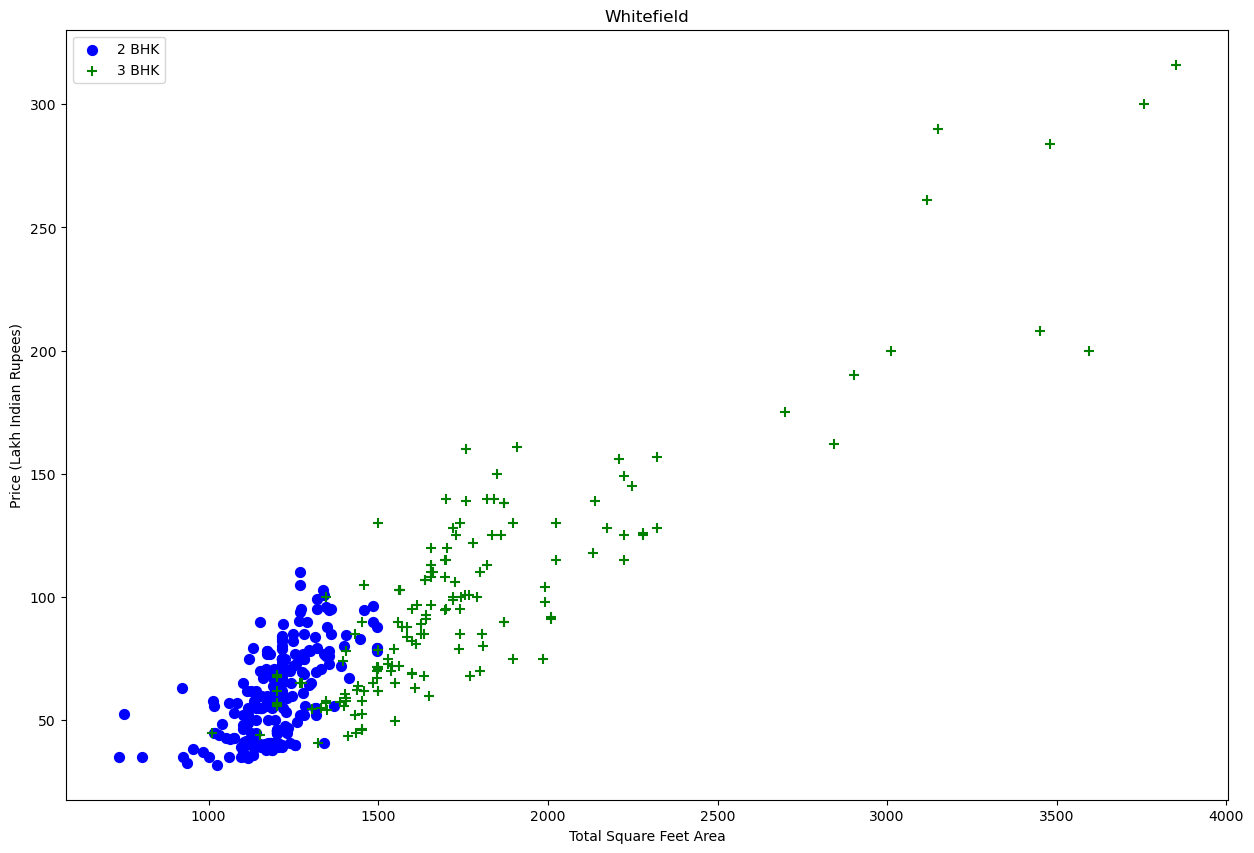

In [227]:
# plotting rajaji nagar location 

def plot_scatter_chart(df,location):                   # df, location are the parameters
    bhk2 = df[(df.location==location) & (df.bhk==2)]      # 2 bhk                   
    bhk3 = df[(df.location==location) & (df.bhk==3)]    # 3 bhk
    matplotlib.rcParams['figure.figsize'] = (15,10)    #  adjusting the figure size
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)               # ploting a 2 bhk scatter plot
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)   # ploting a 3 bhk scatter plot
    plt.xlabel("Total Square Feet Area")               # returns the name of an x label 
    plt.ylabel("Price (Lakh Indian Rupees)")      # returns the name of an y label 
    plt.title(location)                                # returns whatever the location you will give as an parameter
    plt.legend()
    
plot_scatter_chart(df7,"Whitefield")                 # calling function and it returns the scatter plot of rajaji nagar

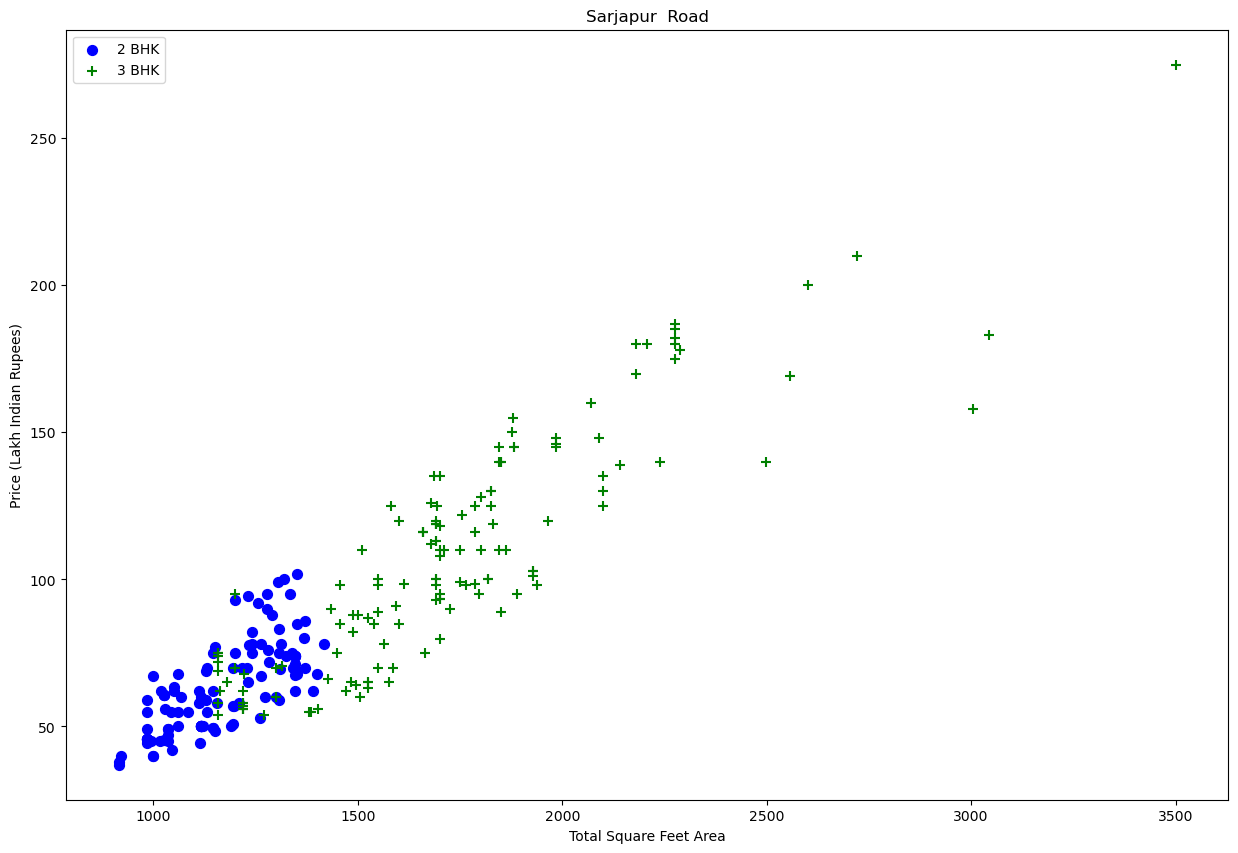

In [228]:
# plotting hebbal location

plot_scatter_chart(df7,"Sarjapur  Road")

We should also remove properties where for same location, 

the price of 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area).

What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**

{
    '1' : 
    
    {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    
    '2' : 
    
    {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [230]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])                # An empty NumPy array exclude_indices is created
    for location, location_df in df.groupby('location'):           # The DataFrame df is grouped by the location column
        
        bhk_stats = {}                                            # creating an empty dictionary
        for bhk, bhk_df in location_df.groupby('bhk'):
            
            # For each bhk (number of bedrooms) within a location, the mean, sd, and count of price_per_sqft are calculated 
            # and stored in the bhk_stats dictionary.
            
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                
    return df.drop(exclude_indices,axis='index')   # returns a new DataFrame with the identified outlier rows removed.

In [231]:
# applying the remove_bhk_outliers function to the new dataframe df8

df8 = remove_bhk_outliers(df7)        # applying the function to new data frame
df8.shape                        # return count of rows and columns

(7317, 7)

**Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties**

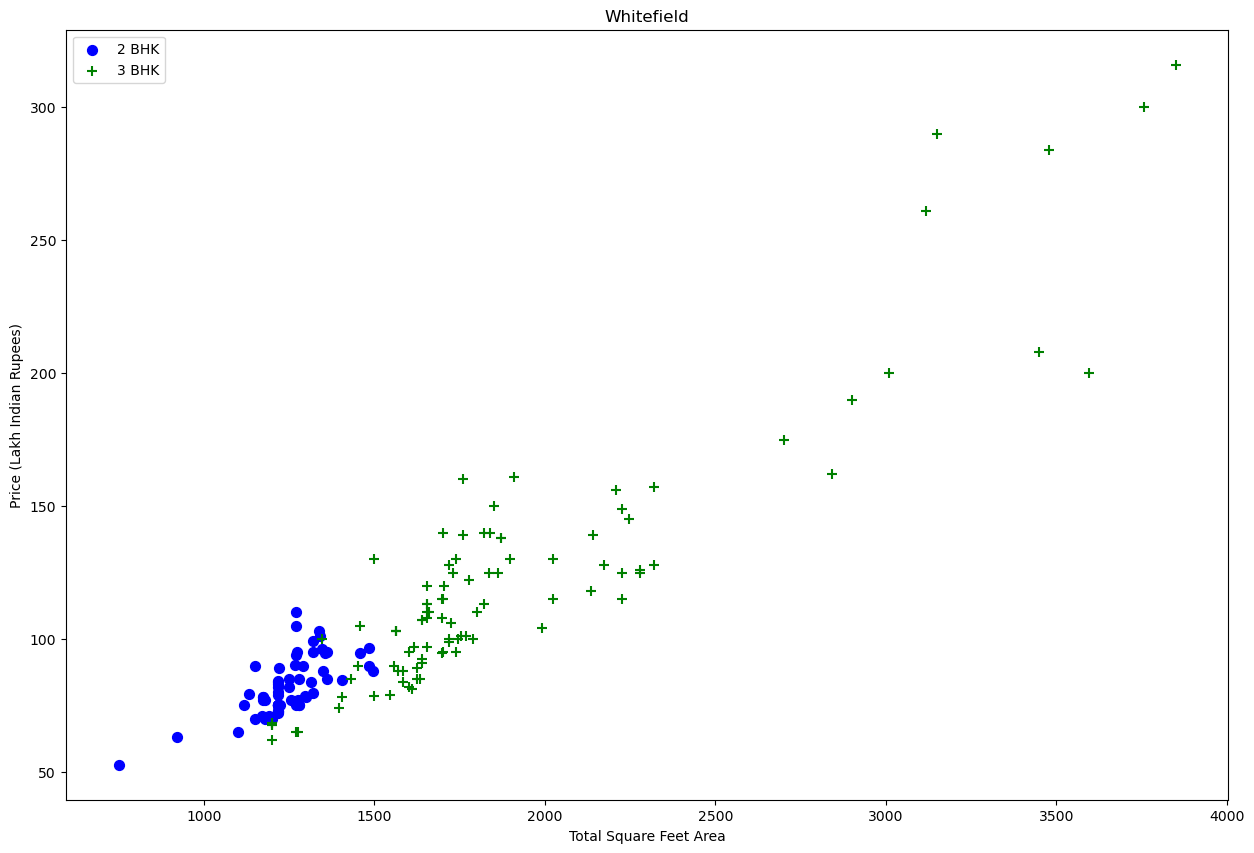

In [234]:
plot_scatter_chart(df8,"Whitefield")

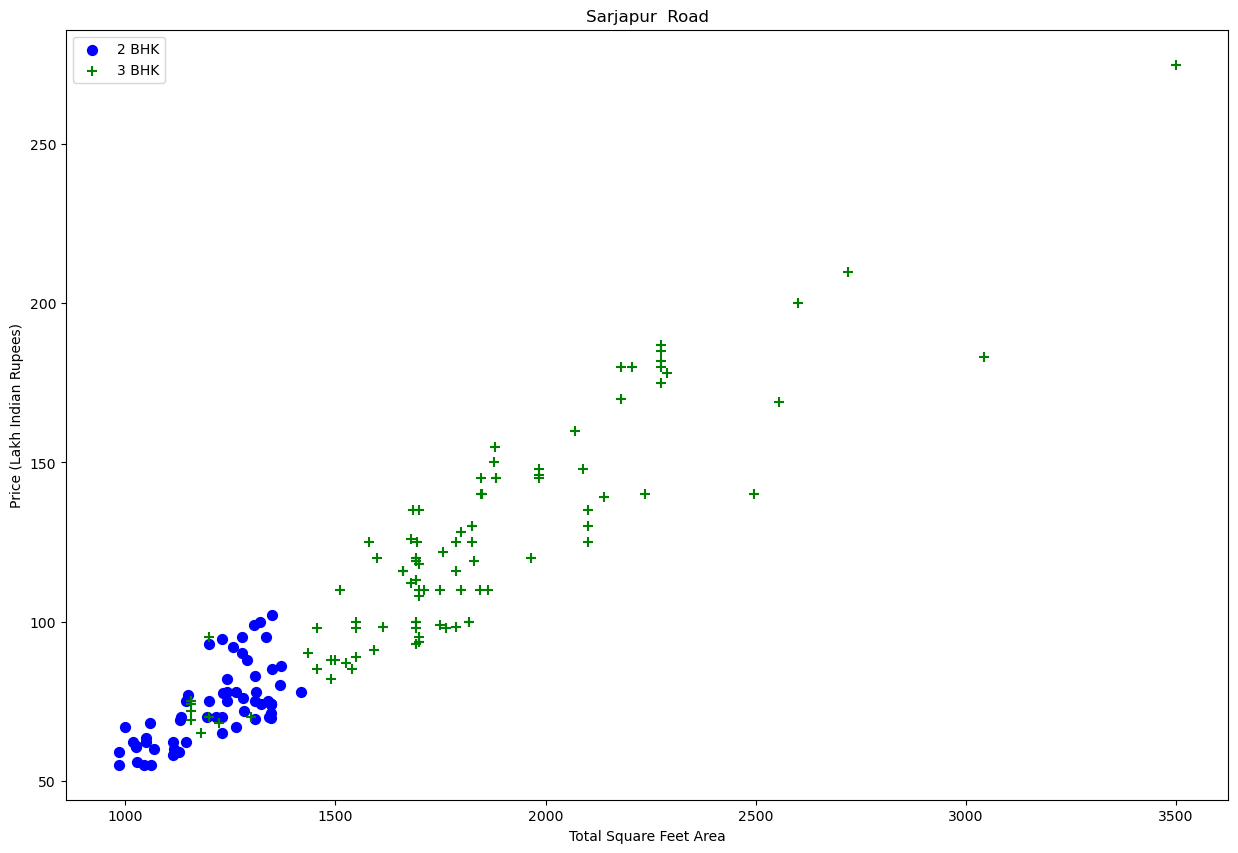

In [235]:
plot_scatter_chart(df8,"Sarjapur  Road")

- there is some 3 bhk price is less than 2bhk price in the same sqft area, but it might not be a problem. 
- It is very hard to remove this type of abnormalities, and there count is also small so we have to ignore it

* Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function

Text(0, 0.5, 'Count')

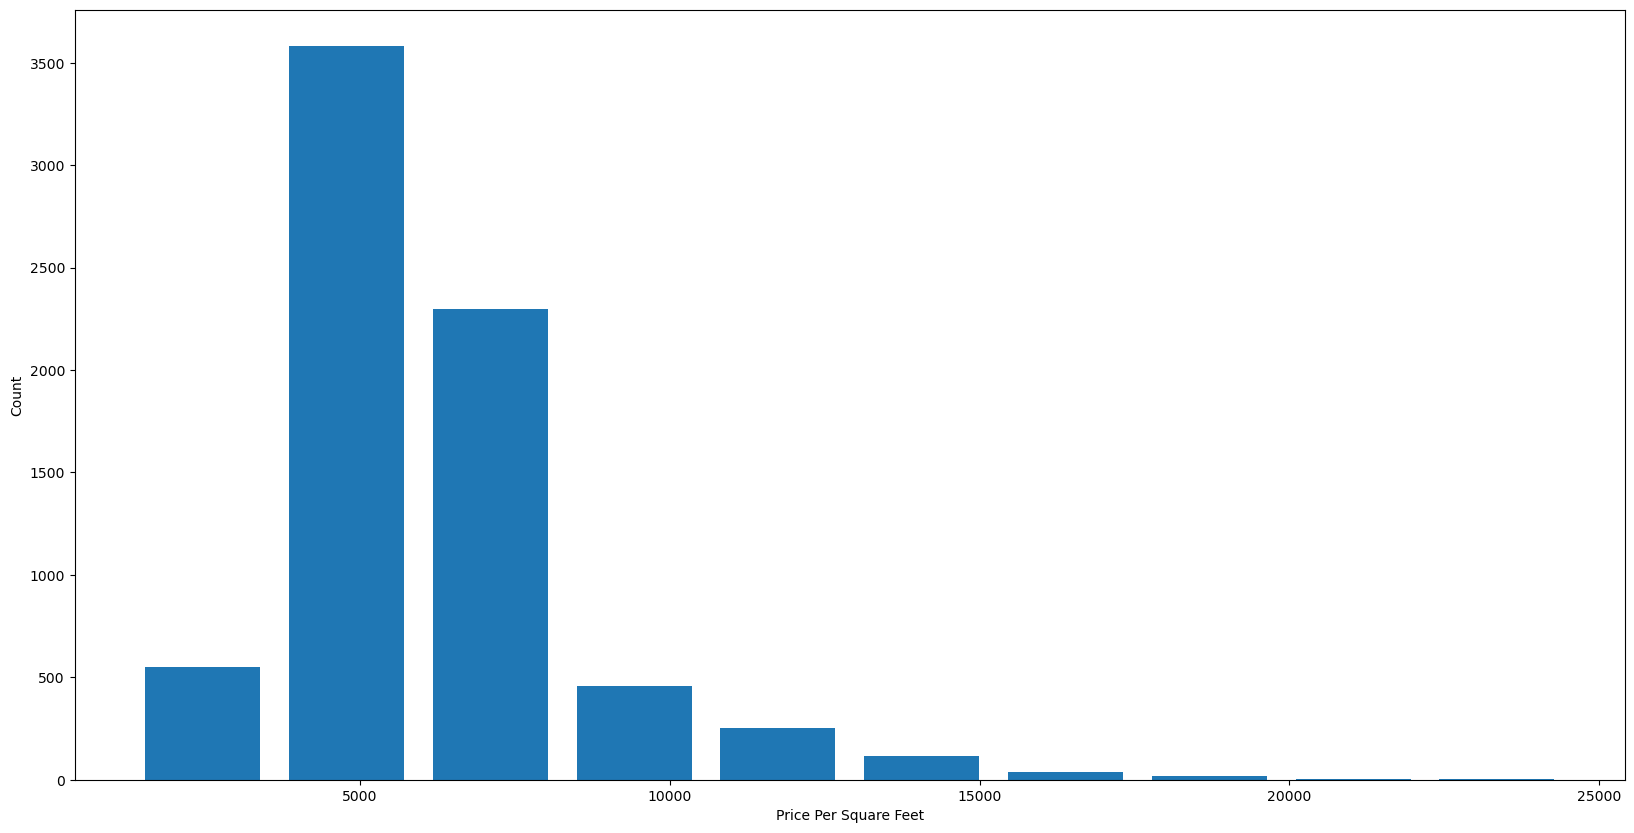

In [240]:
import matplotlib   # importing the library
matplotlib.rcParams["figure.figsize"] = (20,10)      # adjusting the histogram sizes
plt.hist(df8.price_per_sqft,rwidth=0.8)            # plotting a histogram by price per sqft
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")           # the frequency of values - (price per square feet)

* The above graph seems a normal distribution, it follows a belley curve

- **Relative width** - rwidth
-  It is a parameter used in histogram plots to set the relative width of the bars.
-  The default value is 1.0, which means the bars will touch each other.
-  A value less than 1.0 will create space between the bars.

## Outlier Removal Using Bathrooms Feature

In [245]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [246]:
df8.bath.unique()           # returns the unique bathroom column values 

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

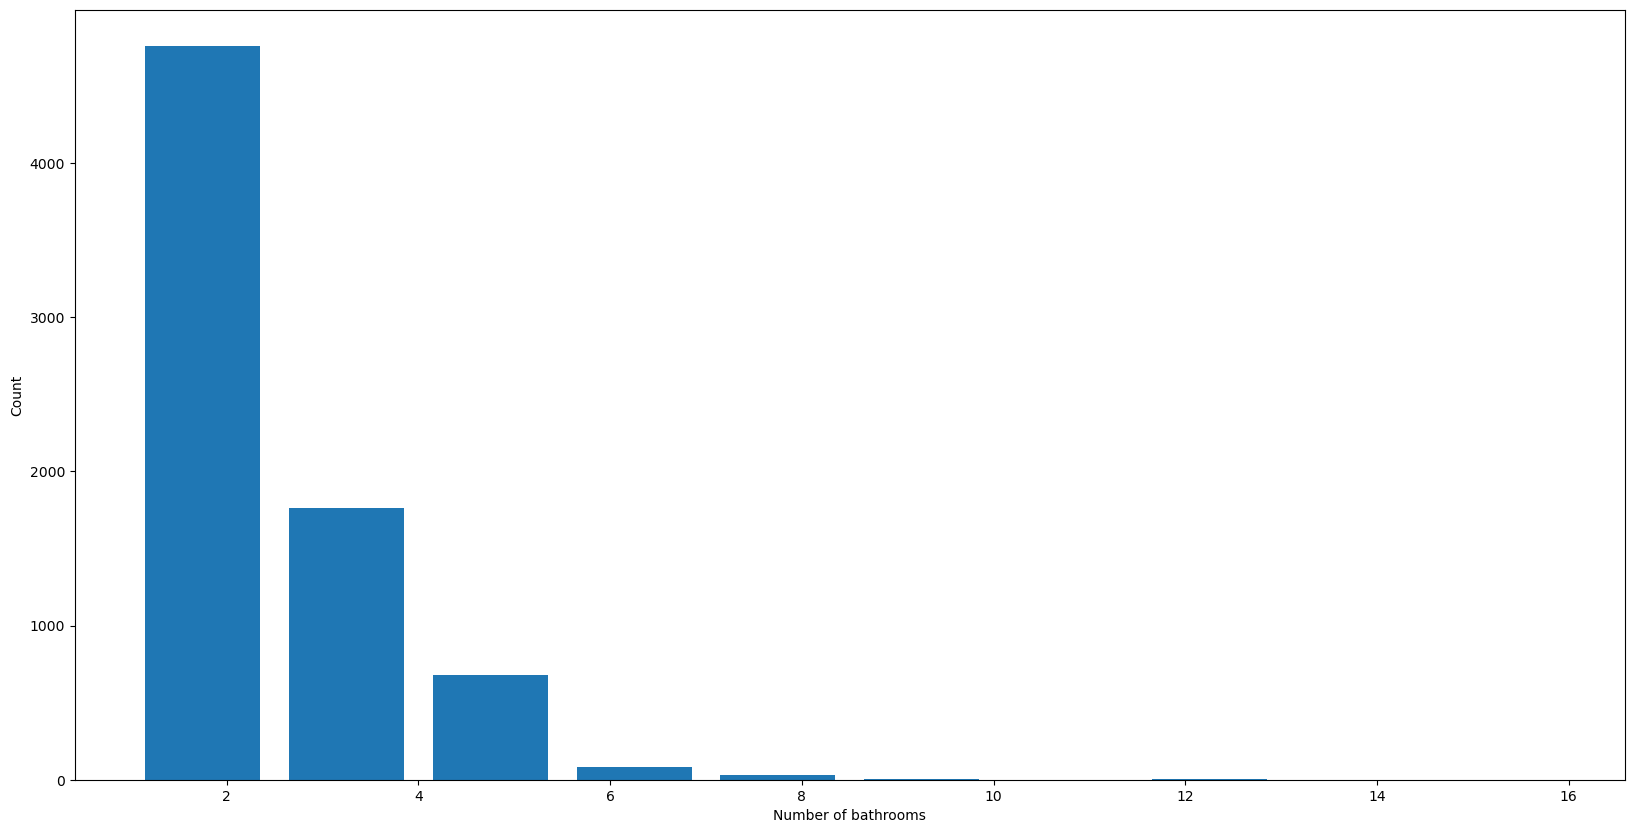

In [247]:
# visualizing it by using histogram

plt.hist(df8.bath,rwidth=0.8)                 # create an histogram by using bath column with 0.8 width
plt.xlabel("Number of bathrooms")      # x- lable
plt.ylabel("Count")                    # y- label, count of no.of bathrooms

In [249]:
df8[df8.bath>10]      # returns the samples which are greater then 10 bathrooms

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


* It is unusual to have 2 more bathrooms than number of bedrooms in a home

- Property ID 1: 3 baths, 2 bhk (Condition: 3 > 2 + 2 is False)

- Property ID 2: 5 baths, 2 bhk (Condition: 5 > 2 + 2 is True)

- Property ID 3: 4 baths, 3 bhk (Condition: 4 > 3 + 2 is False)

- Property ID 4: 7 baths, 3 bhk (Condition: 7 > 3 + 2 is True)

- Property ID 5: 2 baths, 2 bhk (Condition: 2 > 2 + 2 is False)

- Property 2 and Property 4 comes True

In [254]:
df8[df8.bath>df8.bhk+2]          # returns the unusal bathrooms that a no. of bedrooms in a house

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


- Again the business manager has a conversation with you (i.e. a data scientist) 
- that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, 
- you will have total bath = total bed + 1 max. 
- Anything above that is an outlier or a data error and can be removed

In [257]:
df9 = df8[df8.bath<df8.bhk+2]          # create a df not having the unusal bathrooms in a house
df9.shape

(7239, 7)

In [258]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


- Dropping unusal columns

In [262]:
# create a new dataframe

df10 = df9.drop(['size','price_per_sqft'],axis='columns')          # dropping the unusal columns
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


### use One Hot Encoding for Location

In [266]:
# by using get dummies method

dummies = pd.get_dummies(df10.location,dtype= int)   # returns the location of categoriccal values into numerical values of diff columns
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [269]:
print(dummies['other'])   # returns 1 if any 'other' name is there

0        0
1        0
2        0
3        0
4        0
        ..
10233    1
10234    1
10237    1
10238    1
10241    1
Name: other, Length: 7239, dtype: int32


In [271]:
# concatenation of a two dataframes ,df10 and dummies variable
# we are removing other column because of dummies trap or irrelevant data or avoding redundancy or data cleaning purpose
# df11 = pd.concat([df10,dummies],axis='columns') -> 246 columns 

df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')   # returns 245 columns
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Dropping the ‘other’ column from dummies**

1. Irrelevant Data - Unneccssary data
2. Avoiding Redundacy - Duplicates or Redundant 
3. Data cleaning purpose - To ensure the dataset is tidy and relevant
   ant.

In [275]:
# droping location coulumn 
# returns a new dataframe with unique location colummns instead of columns

df12 = df11.drop('location',axis='columns')   

In [278]:
df12.head(5)   # returns the required dataset

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Build a new Model

In [281]:
df12.shape       # returns rows and columns of df12

(7239, 244)

In [282]:
# create a variable that can store all the independent variables as 'X'
# except price remaining variables all are independent

X = df12.drop(['price'],axis='columns') 
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [285]:
X.shape         # return count of rows and columns -> no price columnn here

(7239, 243)

In [287]:
# create a variable that stores all the dependent variables as 'y'
# Here price is only the dependent variable

y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

### train test split method

In [291]:
# Training the model by using train test split method

from sklearn.model_selection import train_test_split   # import the method from scikit learn library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)  # 20 % test data, 80 % training data

- X and y: Features and Target variables.
                                                     
- test_size=0.2: It specifies that 20% of the data should be used for the test set.

- Random_state : you run the code with the same random_state, you will get the same split of the data into training & testing sets.
- 
If you don’t set random_state, the split will be different each time you run the code, which can lead to variability in your model’s performance metric

- Ex: lr.score(X_test, y_test), it will change the accuracy continuosuly if we not using the random_states.

In [293]:
len(X_train)

5791

In [294]:
len(X_test)

1448

In [295]:
5791+1448,    # 80% training data and 20% testing data

(7239,)

## Linear Regression Model

In [297]:
# We are using Linear Regression algorithm here for training the model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()                 # create an obj
lr.fit(X_train,y_train)              # fit the training data

LinearRegression()

In [298]:
# test the accuracy of a model

lr.score(X_test,y_test)   
# you run the code with the same random_state, u'll get the same split of the data into training & testing sets.
#  If you don’t set random_state, the split will be different each time you run the code

0.8629132245229442

### Lasso Regression Model

In [300]:
# lasso regression model
# By assigning Lasso(alpha=1.0),
# you're creating an instance of the Lasso regression model from the sklearn.linear_model module with a regularization strength (alpha) of 1.0.

from sklearn.linear_model import Lasso   # import library 
lasso = Lasso(alpha=1.0) 

In [301]:
lasso.fit(X_train, y_train)

Lasso()

In [302]:
lasso.score(X_test, y_test)     # accuracy if the model by using lasso regression

0.7184797447099162

### Use K Fold cross validation to measure accuracy of our LinearRegression model

**ShuffleSplit**
- ShuffleSplit is a cross-validation technique provided by Scikit-learn. 
- It randomly shuffles and splits the dataset into a specified number of train-test splits.
- This helps in evaluating the model's performance by ensuring that different portions of the data are used for training and testing.

**cross_val_score**
- It is a function that evaluates a model by using cross-validation.
- It splits the data into training and test sets, trains the model on the training set and evaluates it on the test set.
- This process is repeated for each split, and the scores from each iteration are collected to give an overall assessment of the model's performance.

- **When you combine ShuffleSplit with cross_val_score** you can evaluate the performance of a model across multiple random splits of the data.
- This gives you a more robust estimate of the model's performance by reducing the variance that can arise from a single train-test split.
- ShuffleSplit defines how to shuffle and split the data.
- cross_val_score uses this strategy to train and evaluate the model multiple times.

#### Example of Shufflesplit for our Understanding

- from sklearn.model_selection import ShuffleSplit

#### Create a ShuffleSplit instance, or Object

- ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

### Example data

- X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
- y = [1, 2, 1, 2, 1]

#### Generate indices to split data into training and test set
for train_index, test_index in ss.split(X):
    print("TRAIN:", train_index, "TEST:", test_index) [0]


#### output : 

- n_splits=5, It iterates on five splits
  
- TRAIN: [4 2 0 3] TEST: [1] -->First iteration it takes 4,2,0,3 then '1' as test
   
- TRAIN: [1 2 0 4] TEST: [3] --> Next iteration it takes 1,2,0,4 then '3' as test 
  
- TRAIN: [0 3 4 2] TEST: [1] --> Next iteration it takes 0,3,4,2 then '1' as test
  
- TRAIN: [1 2 3 4] TEST: [0] --> Next iteration it takes 1,2,3,4 then '1' as test
  
- TRAIN: [2 3 1 4] TEST: [0] --> Next iteration it takes 2,3,1,4 then '0' as tesst

**Shuffle split method generates random train/test indices to split data into training and testing sets.** 

In [319]:
# ShuffleSplit object, which is a specific type of cross-validation splitter. 

from sklearn.model_selection import ShuffleSplit    # This splitter randomly shuffles and splits the data into training and test sets.
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)    # n_splits=5: Specifies the number of re-shuffling & splitting iterations.

- X: The feature matrix (input variables).
- y: The target vector (output variable).
- cv=cv: The cross-validation splitting strategy
- Shuffles and splits the data into training and test sets 5 times (since n_splits=5).
- Trains the LinearRegression model on the training set and evaluates it on the test set for each split.
- Returns an array of scores (one for each split). These scores typically represent the model's performance metric (e.g., R-squared) on the test sets.

In [322]:
# testing the accuracy of the Linear Regression model

cross_val_score(LinearRegression(), X, y, cv=cv)        #  All 5 splits gives accuary as more than 0.8 % -> '> 80 %'

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

### Use K Fold cross validation to measure accuracy of our Lasso model

In [324]:
# import libraries

from sklearn.model_selection import ShuffleSplit   
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(Lasso(), X, y, cv=cv)                  #  All 5 splits gives accuary as less than 0.8 % -> '< 80 %'

array([0.6982002 , 0.73053589, 0.72642204, 0.7586498 , 0.71603286])

In [360]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

**Linear Regression gives the best prediction than lasso** Linear Regression has more accurate than Lasso 

In [327]:
# Create a function that predicts the price of a house based on its location, square footage, number of bathrooms, and BHK

def predict_price(location,sqft,bath,bhk):         # location, sqft, bath, bhk are the parameters -> independet variables
    loc_index = np.where(X.columns==location)[0][0] 

    x = np.zeros(len(X.columns))            # create an array 
    x[0] = sqft                          
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

#### Example

- The dataset contains the column names ['sqft', 'bath', 'bhk', 'Downtown', 'Uptown', 'Subtown']

- Assume we have the following input parameters:

- location: "Downtown"

- sqft: 1500

- bath: 2

- bhk: 3

- **Find the 'Location' Index:**

- loc_index = np.where(X.columns == "Downtown")[0][0]  # loc_index = 3
- The location index for "Downtown" is 3.

**Initialize the Feature Array:**

- x = np.zeros(len(X.columns))  # x = [0, 0, 0, 0, 0, 0]

- **Set the Feature Values:**
  
- x[0] = 1500  # x = [1500, 0, 0, 0, 0, 0]
- x[1] = 2     # x = [1500, 2, 0, 0, 0, 0]
- x[2] = 3     # x = [1500, 2, 3, 0, 0, 0]
  
- **Set the Location Feature:**

- if loc_index >= 0:
-   x[loc_index] = 1  # x = [1500, 2, 3, 1, 0, 0]

- Predict the House Price:

- return lr.predict([x])[0]  # Assuming the predicted price is 500000
- The function will return the predicted house price based on the input features.
- In this example, let's assume the predicted price is ₹500,000.

#### Erros
- For not following the proper syntax

In [334]:
# it runs the it predicts the negative output due to not follow the index

# predict_price('Indira Nagar',2,2,1000)              # It returns '-1385.6680772050067'

In [336]:
# it returns index error

# predict_price(1000, 2, 2,'Indira Nagar')         # Returns index error, location must be in first index 

In [338]:
predict_price('1st Phase JP Nagar',1000, 2, 2)        # returns 83+ lakhs

83.8657025831235

In [340]:
predict_price('Indira Nagar',1000, 2, 2)     # returns 1 crore 93+ lakhs

193.3119773317996

In [342]:
predict_price('1st Phase JP Nagar',1000, 3, 3)           # returns 86+ lakhs

86.08062284987108

- Here 2 BHK flat is more price than some 3 BHK flat, bez it depends the price depends on the remaining attributes as well
- Such as location, sqft, bath.

In [345]:
predict_price('Indira Nagar',1000, 3, 3)                # returns 1 crore 95+ lakhs

195.52689759854718

#### Export the tested model to a pickle file

In [363]:
# import pickle
# with open('banglore_home_prices_model.pickle','wb') as f:
#     pickle.dump(lr,f)

#### Export location and column information to a file that will be useful later on in our prediction application

In [373]:
# import json
# columns = {
#     'data_columns' : [col.lower() for col in X.columns]         # we are converting all the column values into lower case, it helps 
# }                                                               # Ex: Vishveshwarya Layout - Above lower method helps to type everything in lower case
# with open("columns.json","w") as f:
#     f.write(json.dumps(columns))